# Exercise 2 - Pre-trained models

### Applying already pre-trained models

We have previously trained a bodypart predictor, that can classify one of the 19 following bodyparts:

In [24]:
class_map = {0: 'abdomen',
             1: 'ankle',
             2: 'buttocks',
             3: 'elbow',
             4: 'face',
             5: 'foot',
             6: 'groin',
             7: 'hand',
             8: 'knee',
             9: 'lower_arm',
             10: 'lower_back',
             11: 'lower_leg',
             12: 'neck',
             13: 'shoulder',
             14: 'thorax',
             15: 'upper_arm',
             16: 'upper_back',
             17: 'upper_leg',
             18: 'wrist'}

### Loading the model
Keras provies a very good model format that is easily saveable and loadable.

We can load the model and inspect as we've done previously:

In [ ]:
from keras.models import load_model

model = load_model('bodypart_predictor.h5')

## This is a big model, have a look by un-commenting this line
# model.summary()


We can see the shape of the output of a model by calling:

In [4]:
model.outputs

[<tf.Tensor 'dense_1_1/Softmax:0' shape=(?, 19) dtype=float32>]

This tells us that the model will give us a vector of shape `(?, 19)`. The question mark will take on the number of images that we pass through on a given pass of the model. So if we evaluate 3 images we'll get a 3 x 19 matrix out.

The 19 is the number of bodyparts, and the value in this index of the vector will describe the probability that the image contains a given bodypart.

### Let's try applying it to an image

Now we need to apply the model to an image. This requires that we do a little bit of pre-processing of the image.
We can load an image from the disk:

In [5]:
%ls 

Deep learning workshop - Techfestival 2018 - Melanoma detection.ipynb
Deeplearning workshop - techfestival 2018.pdf
LICENSE
README.md
Untitled.ipynb
bodypart_predictor.h5
requirements.txt
sort_isic_images.py


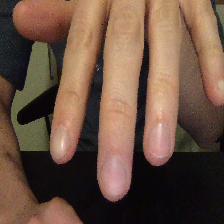

In [27]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img


image = load_img('fingers.jpg', target_size=(224, 224))
image

In [26]:
# convert it to array
img = img_to_array(image)
img

array([[[  39.,   44.,   40.],
        [  37.,   38.,   30.],
        [  35.,   35.,   33.],
        ..., 
        [  72.,   51.,   32.],
        [  65.,   44.,   23.],
        [  67.,   45.,   24.]],

       [[  44.,   49.,   45.],
        [  28.,   29.,   23.],
        [  37.,   37.,   35.],
        ..., 
        [  69.,   49.,   24.],
        [  72.,   55.,   29.],
        [  77.,   60.,   34.]],

       [[  37.,   39.,   36.],
        [  36.,   36.,   34.],
        [  43.,   43.,   43.],
        ..., 
        [  74.,   52.,   31.],
        [  71.,   49.,   28.],
        [  70.,   48.,   27.]],

       ..., 
       [[ 156.,  109.,   91.],
        [ 155.,  109.,   94.],
        [ 150.,  107.,   91.],
        ..., 
        [  21.,   17.,   14.],
        [  15.,   11.,   10.],
        [  13.,    9.,    8.]],

       [[ 155.,  108.,   82.],
        [ 147.,  101.,   77.],
        [ 150.,  105.,   82.],
        ..., 
        [  16.,   15.,   10.],
        [  17.,   13.,   10.],
        [ 

The model is transfer learned from a model trained on ImageNet where they normalize the images by subtracting the means of each of the color channels (RGB), so to use the model we need to do the same:

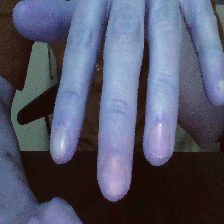

In [15]:
import numpy as np

def imagenet_norm(image):
    # Mean RGB values. Do not change these values!
    vgg_mean = np.array([123.68, 116.779, 103.939], dtype=np.float32).reshape((1, 1, 3))

    # Normalize image
    image = image - vgg_mean
    image = image[:, :, ::-1]  # Reverse axis rgb->bgr

    return image

img = imagenet_norm(img)
array_to_img(img)

Looks a bit wierd, but this is what the model is used to - let's try and run it!

In [17]:
prediction = model.predict(np.array([img]))  # note here that we can pass a list of images to the model, not just one.
prediction

array([[  8.47794546e-09,   3.67751340e-08,   9.60094167e-06,
          6.29931310e-05,   1.36428140e-03,   1.72046944e-04,
          2.03624164e-04,   9.10109758e-01,   5.58311003e-04,
          2.39938413e-06,   1.34321599e-05,   5.98267507e-05,
          9.64322933e-09,   3.48887849e-03,   1.05533331e-07,
          3.86852480e-04,   8.44357260e-07,   8.35669562e-02,
          2.30006520e-08]], dtype=float32)

This then describes the probability for each of the classes.

Lets' find the highest one:

In [23]:
class_index = np.argmax(prediction)
class_index 

7

This is the index from the `class_map` defined in the top:

In [28]:
class_map[class_index]

'hand'

YAY! that was the class we were looking for!

### Exercise A:
Now it's your turn, try taking some photos with your phone and upload them by going back to the folder tab and clicking "upload".
Try changing the path to be your image instead. Below we defined a small helper function to apply a model to an image:

Question 1: Can you take a picture where the model is not classifying correctly?

Question 2: What happens when you have multiple bodyparts in an image?

Question 3: What happens when there are no bodyparts in the image?

The predicted class for this image is hand, with 0.91 certainty:


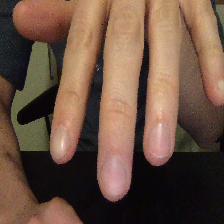

In [34]:
def apply_model(image_path):
    # Load and normalize
    img = load_img('fingers.jpg', target_size=(224, 224))
    norm_img = imagenet_norm(img_to_array(img))
    
    # Apply model and get class results
    class_pred = model.predict(np.array([norm_img]))
    proba = np.max(class_pred)
    class_name = class_map[np.argmax(class_pred)]
    
    # Print output and return image to be displayed
    print('The predicted class for this image is %s, with %0.2f certainty:' % (class_name, proba))
    return img

apply_model('fingers.jpg')

In [ ]:
apply_model("<< Insert your own image name here >>")

## Training a model

